In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [20]:
df_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [21]:
df_data['Churn'].replace(to_replace=['Yes', 'No'], value = [1,0], inplace = True)


C:\Users\guido\AppData\Local\Temp\ipykernel_27152\3862153358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data['Churn'].replace(to_replace=['Yes', 'No'], value = [1,0], inplace = True)
C:\Users\guido\AppData\Local\Temp\ipykernel_27152\3862153358.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

In [22]:
#Eliminamos los features que no presentan un alto grado de correlacion
df_data2 = df_data.copy()
df_data2 = df_data2.drop(['gender', 'MultipleLines', 'PhoneService', 'StreamingMovies', 'StreamingTV'], axis=1)

In [23]:
df_data2

,customerID,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,No,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,No,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,24,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,0,Yes,Yes,11,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,Yes,No,4,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [24]:
scaler = MinMaxScaler()

In [25]:
#Convertimos las variables categoricas a numericas y normalizamos los datos
df_data2 = pd.get_dummies(df_data2)
df_scaled_r = scaler.fit_transform(df_data2)
df_scaled_r = pd.DataFrame(df_scaled_r)
df_scaled_r.columns = df_data2.columns

In [26]:
#Dividimos el data set en features y el target de nuestro modelo
x_r = df_scaled_r.drop(['Churn'], axis=1)
y_r = df_scaled_r['Churn']


In [28]:
#Aplicamos balanceo de clases con SMOTE
oversample = SMOTE()
x_rsmote, y_rsmote = oversample.fit_resample(x_r, y_r)


In [29]:
#Dividimos el dataset
x_train_rsmote, x_test_rsmote, y_train_rsmote, y_test_rsmote = train_test_split(x_rsmote,y_rsmote,train_size=0.7, random_state=42)

In [30]:
#Creamos el modelo
model_rsmote = LogisticRegression()
model_rsmote.fit(x_train_rsmote, y_train_rsmote)
pred_rsmote = model_rsmote.predict(x_test_rsmote)

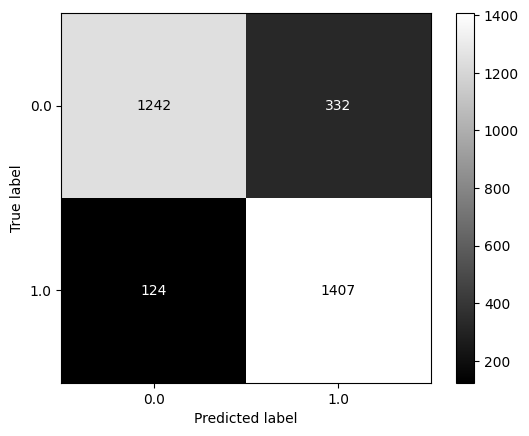

In [31]:
#Visualizamos los resultados
cm_rsmote = confusion_matrix(y_test_rsmote, pred_rsmote, labels=model_rsmote.classes_)
disp_rsmote = ConfusionMatrixDisplay(confusion_matrix=cm_rsmote, display_labels=model_rsmote.classes_)
disp_rsmote.plot(cmap='gray')
plt.show()


In [32]:
print("Accuracy model: ", metrics.accuracy_score(y_test_rsmote, pred_rsmote))
print("Recall Churn='NO': ", metrics.recall_score(y_test_rsmote, pred_rsmote, pos_label=0))
print("Recall Churn='YES': ", metrics.recall_score(y_test_rsmote, pred_rsmote, pos_label=1))

Accuracy model:  0.8531400966183574
Recall Churn='NO':  0.7890724269377383
Recall Churn='YES':  0.9190071848465056
